In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('training_normalized.csv')

In [3]:
df2=pd.read_csv('testing_normalized.csv')

In [4]:
df3=pd.read_csv('testing.csv')

In [5]:
X_train=df1.drop(['Experiment no.','UTS (Mpa)'],axis=1)

In [6]:
y_train=df1['UTS (Mpa)']

In [7]:
X_test=df2.drop(['Experiment no.','UTS (Mpa)'],axis=1)

In [8]:
y_test=df2['UTS (Mpa)']

In [9]:
y_test_actual=df3['UTS (Mpa)']

In [10]:
model=Sequential()
model.add(Dense(8,input_dim=8,kernel_regularizer=keras.regularizers.l2(0.01),bias_initializer=keras.initializers.random_normal()))
model.add(Dense(13,input_dim=8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01),bias_initializer=keras.initializers.random_normal()))
model.add(Dense(18,input_dim=13,activation='relu'))
model.add(Dense(1,activation='linear'))
weights = model.get_weights()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 13)                117       
                                                                 
 dense_2 (Dense)             (None, 18)                252       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 460
Trainable params: 460
Non-trainable params: 0
_________________________________________________________________


In [12]:
keras.optimizers.SGD(learning_rate=0.0000018,momentum=0.323,name="SGD")

In [13]:
model.compile(loss=keras.losses.mse,optimizer='SGD',metrics=['mse'])

In [14]:
history=model.fit(X_train,y_train,epochs=2555,verbose=1,validation_data=(X_test,y_test))

Epoch 1/2555
2/2 [==============================] - 0s 146ms/step - loss: 0.4848 - mse: 0.2998 - val_loss: 0.4648 - val_mse: 0.2797
Epoch 2/2555
2/2 [==============================] - 0s 22ms/step - loss: 0.3540 - mse: 0.1690 - val_loss: 0.3569 - val_mse: 0.1719
Epoch 3/2555
2/2 [==============================] - 0s 23ms/step - loss: 0.2886 - mse: 0.1036 - val_loss: 0.2888 - val_mse: 0.1038
Epoch 4/2555
2/2 [==============================] - 0s 19ms/step - loss: 0.2623 - mse: 0.0773 - val_loss: 0.2711 - val_mse: 0.0862
Epoch 5/2555
2/2 [==============================] - 0s 20ms/step - loss: 0.2557 - mse: 0.0708 - val_loss: 0.2519 - val_mse: 0.0671
Epoch 6/2555
2/2 [==============================] - 0s 17ms/step - loss: 0.2521 - mse: 0.0673 - val_loss: 0.2463 - val_mse: 0.0616
Epoch 7/2555
2/2 [==============================] - 0s 24ms/step - loss: 0.2514 - mse: 0.0667 - val_loss: 0.2415 - val_mse: 0.0569
Epoch 8/2555
2/2 [==============================] - 0s 21ms/step - loss: 0.2509 - 

In [15]:
prediction=model.predict(X_test)

1/1 [==============================] - 0s 84ms/step


In [16]:
prediction

array([[0.6516296 ],
       [0.7971314 ],
       [1.0423079 ],
       [0.7188275 ],
       [0.78834826],
       [0.7974588 ],
       [0.7870775 ]], dtype=float32)

In [17]:
y_test

0    0.573372
1    0.885382
2    0.976951
3    0.791311
4    0.959530
5    0.891397
6    0.752911
Name: UTS (Mpa), dtype: float64

In [18]:
prediction_actual=prediction*453.11

In [19]:
prediction_actual

array([[295.2599 ],
       [361.1882 ],
       [472.2801 ],
       [325.70792],
       [357.20847],
       [361.33655],
       [356.63266]], dtype=float32)

In [20]:
y_test_actual

0    265.93
1    410.64
2    453.11
3    367.01
4    445.03
5    413.43
6    349.20
Name: UTS (Mpa), dtype: float64

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_test,prediction)

0.00896180251887095

Text(0, 0.5, 'MSE')

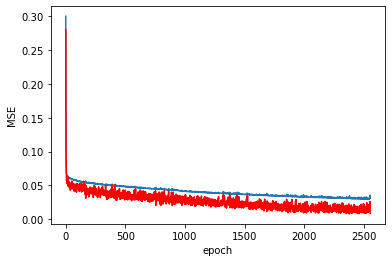

In [23]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'],color='r')
plt.xlabel('epoch')
plt.ylabel('MSE')